In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'suburb_info.xlsx'
data = pd.read_excel(file_path)

print(data.head())

# 查找是否有缺失值
print(data.isnull().sum())

print(data.describe())



       suburb  number_of_houses  number_of_units   municipality aus_born_perc  \
0  ABBOTSFORD              2304             4706          Yarra           68%   
1  ABERFELDIE              1410              453  Moonee Valley           81%   
2   ALBANVALE              1897              138       Brimbank           46%   
3      ALBION              1389             1392       Brimbank           52%   
4  ALPHINGTON              1729             1099        Darebin           73%   

  median_income median_house_price  population  
0        $1,797         $1,299,400        4025  
1        $1,571         $1,926,600       22442  
2          $907           $594,200       54005  
3          $929           $739,100       30677  
4        $1,538         $1,729,600        9227  
suburb                0
number_of_houses      0
number_of_units       0
municipality          0
aus_born_perc         0
median_income         0
median_house_price    0
population            0
dtype: int64
       number_

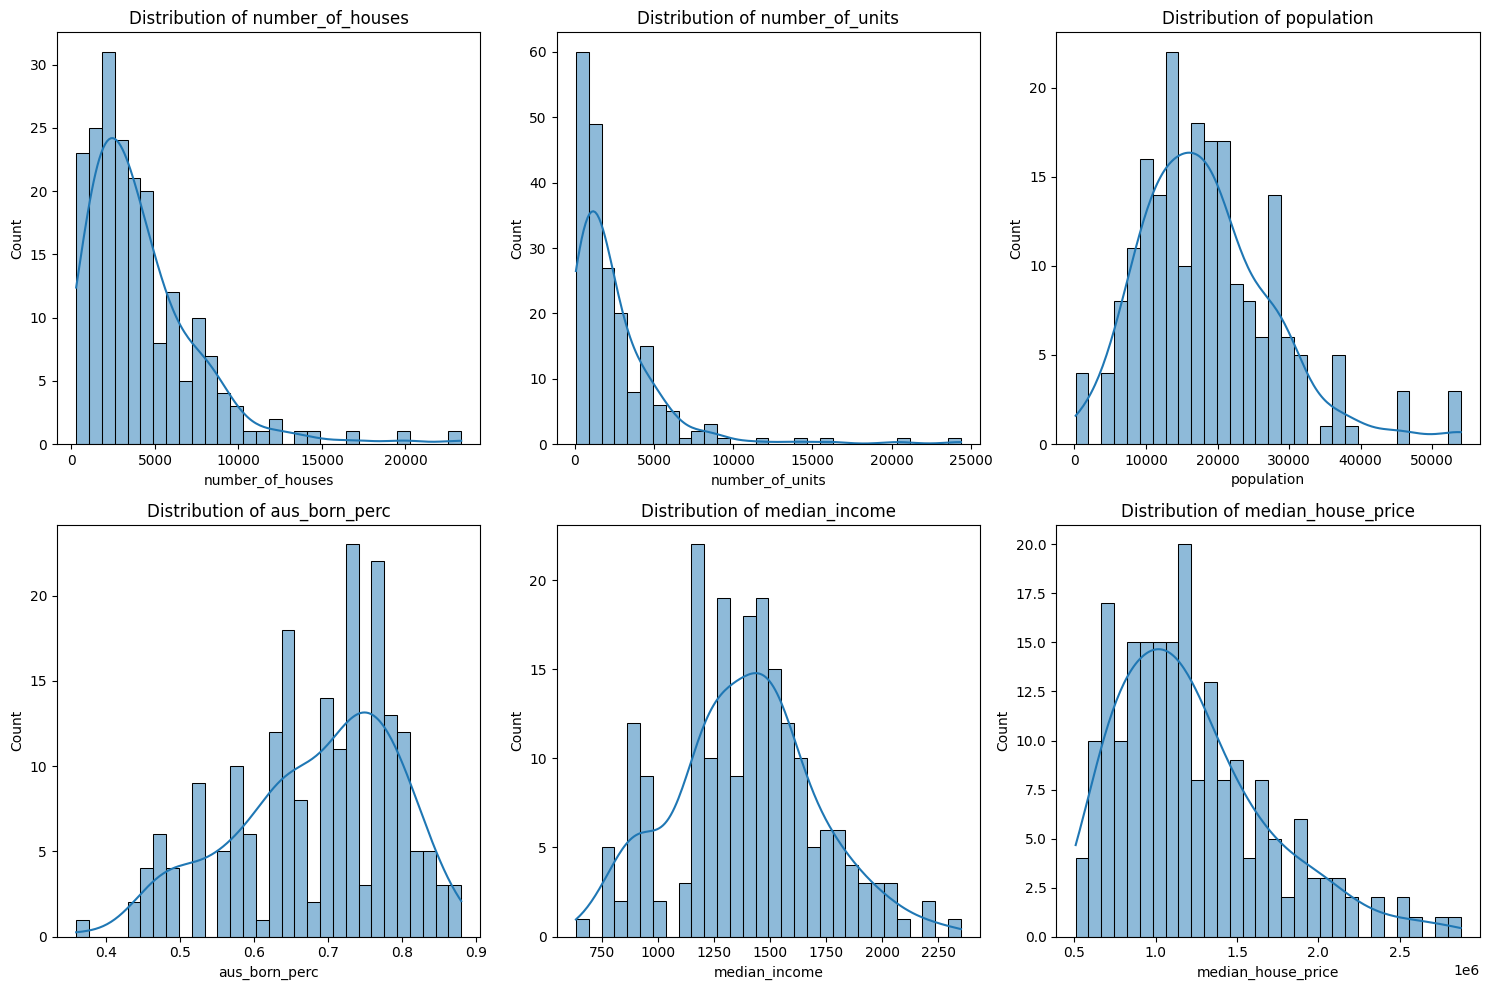

,number_of_houses,number_of_units,population,aus_born_perc,median_income,median_house_price
count,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02
mean,4155.767327,2480.410891,18659.311881,0.683663,1387.935644,1.218817e+06
std,3400.864988,3132.684712,9604.187282,0.107613,317.841321,4.716807e+05
min,283.000000,60.000000,170.000000,0.360000,633.000000,5.072000e+05
25%,1973.500000,620.500000,12063.000000,0.620000,1182.250000,8.706750e+05
50%,3256.500000,1603.000000,17583.000000,0.700000,1393.000000,1.134500e+06
75%,5518.500000,3089.000000,24045.000000,0.770000,1560.000000,1.467550e+06
max,23338.000000,24380.000000,54005.000000,0.880000,2352.000000,2.875800e+06


In [3]:
summary_stats = data[['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']].describe()

#为每一列绘制直方图，检查它们的分布
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


columns = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']

for i, col in enumerate(columns):
    sns.histplot(data[col], bins=30, ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Distribution of {col}')
    axes[i//3, i%3].set_xlabel(col)

plt.tight_layout()
plt.show()

summary_stats

分布:
Number_of_houses、number_of_units和population表现出正偏性，需要进行转换以减少偏性。
Aus_born_perc是正态分布的。
缩放:
这些列有显著不同的范围，这表明需要缩放以使所有特征达到相同的尺度。

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 删除 'median_income' 和 'median_house_price' 列中的 $ 和 , 符号并转换为 float
data['median_income'] = data['median_income'].replace({'\$': '', ',': ''}, regex=True).astype(float)
data['median_house_price'] = data['median_house_price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# 检查 'aus_born_perc' 列是字符串还是已经是浮点数，并根据情况处理
if data['aus_born_perc'].dtype == 'object':  
    data['aus_born_perc'] = data['aus_born_perc'].str.replace('%', '').astype(float) / 100
elif data['aus_born_perc'].max() > 1:  
    data['aus_born_perc'] = data['aus_born_perc'] / 100

        
# 应用对数转换特征
data['log_number_of_houses'] = np.log1p(data['number_of_houses'])
data['log_number_of_units'] = np.log1p(data['number_of_units'])
data['log_population'] = np.log1p(data['population'])

# 重新检查并清理median_income列，确保所有值都是数字
data['median_income'] = pd.to_numeric(data['median_income'], errors='coerce')

data['log_median_income'] = np.log1p(data['median_income'])

# 确保正确清理aus_born_perc并将其转换为数值
data['aus_born_perc'] = pd.to_numeric(data['aus_born_perc'], errors='coerce')

# 标准化
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(data[['log_number_of_houses', 'log_number_of_units', 'log_population', 'aus_born_perc', 'log_median_income']])

scaled_data = pd.DataFrame(scaled_columns, columns=['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income'])

scaled_data['median_house_price'] = data['median_house_price']

scaled_data

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
C:\Users\51196\AppData\Local\Temp\ipykernel_98052\504498930.py:5: SyntaxWarning: invalid escape sequence '\$'
  data['median_income'] = data['median_income'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\51196\AppData\Local\Temp\ipykernel_98052\504498930.py:6: SyntaxWarning: invalid escape sequence '\$'
  data['median_house_price'] = data['median_house_price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


,scaled_number_of_houses,scaled_number_of_units,scaled_population,scaled_aus_born_perc,scaled_median_income,median_house_price
0,-0.335317,1.045888,-1.992871,-0.034127,1.194545,1299400.0
1,-0.923650,-0.913971,0.506795,1.176908,0.632735,1926600.0
2,-0.568213,-1.905858,1.784290,-2.083570,-1.662831,594200.0
3,-0.941626,0.025536,0.961522,-1.524631,-1.562702,739100.0
4,-0.679314,-0.172360,-0.786150,0.431656,0.544002,1729600.0
...,...,...,...,...,...,...
197,-0.129828,-1.717657,-6.588427,1.735847,1.297934,866400.0
198,-0.390118,0.998648,0.167717,-0.220440,0.603366,1629600.0
199,0.910603,-1.381091,-5.542239,1.083751,0.014533,704700.0
200,-1.033918,-2.348122,-0.396284,0.990595,0.320737,998200.0


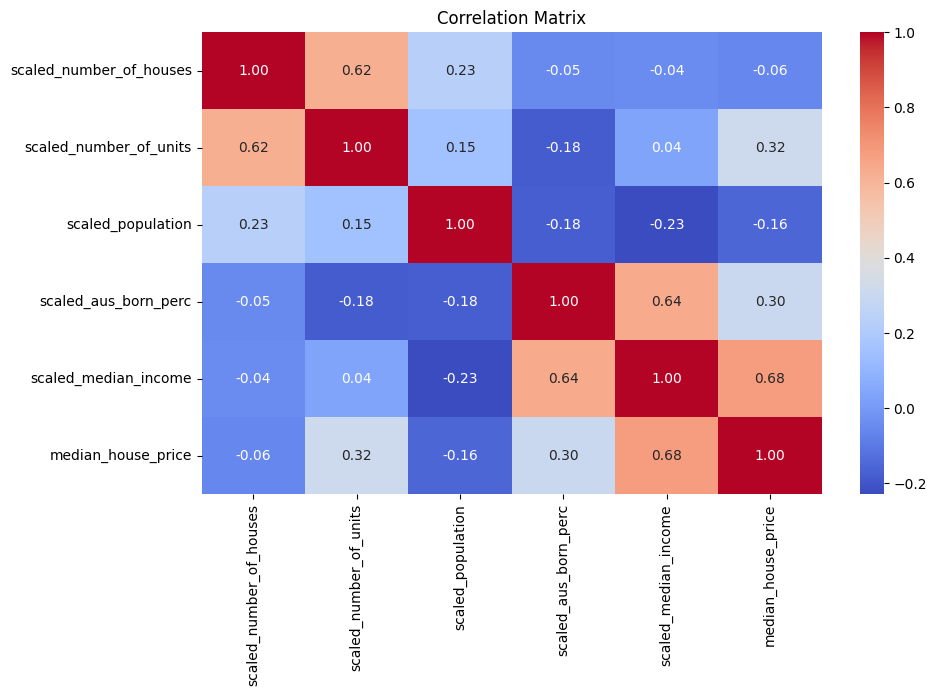

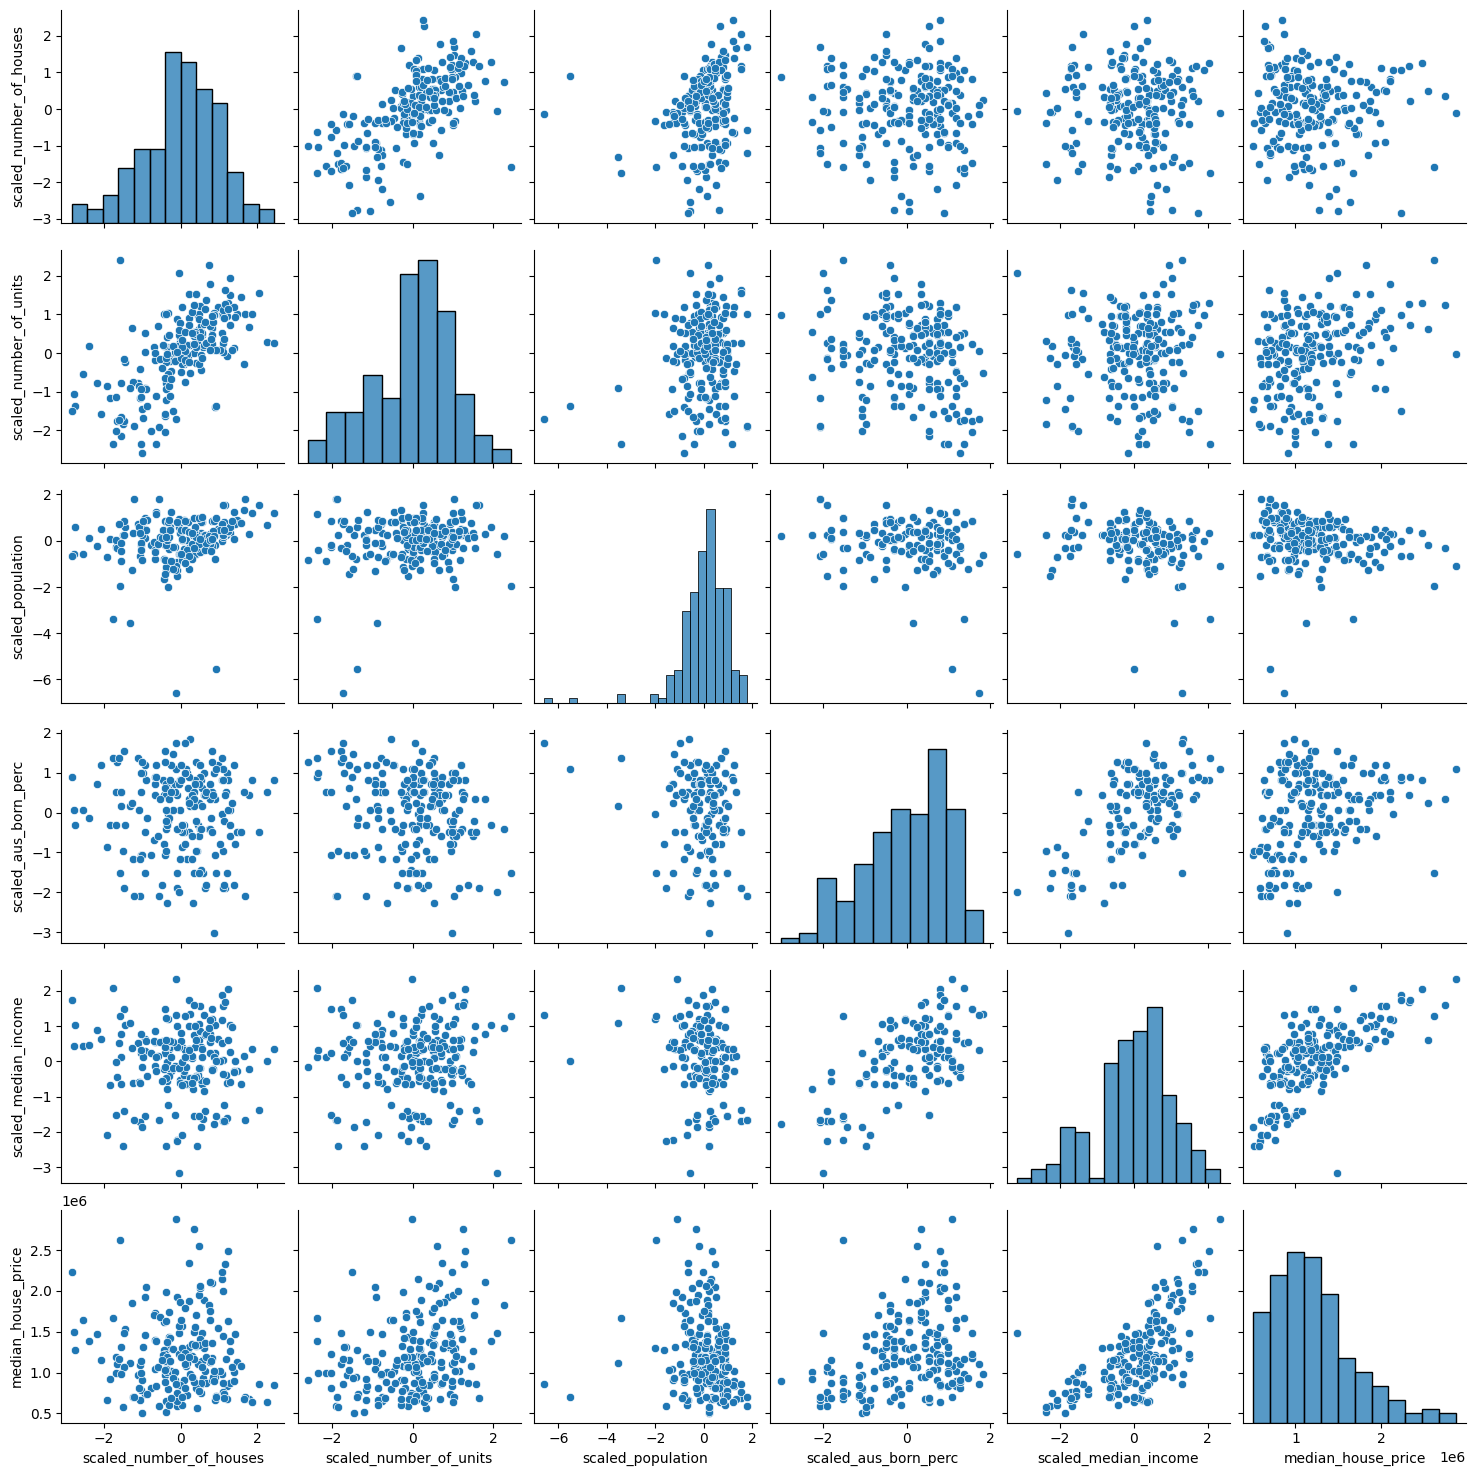

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 相关性矩阵
corr_matrix = scaled_data.corr()

# 画热力图
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 绘制散点图查看自变量与目标变量的关系
sns.pairplot(scaled_data)
plt.show()


使用散点图和热力图来检查自变量与median_house_price之间的线性关系，了解每个特征与目标变量的关系强度。
由图可知scaled_median_income 和 scaled_number_of_houses 可能是与 median_house_price 最相关的特征。

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 计算 VIF
X = scaled_data[['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
vif_data



,feature,VIF
0,scaled_number_of_houses,1.757799
1,scaled_number_of_units,1.842711
2,scaled_population,1.113303
3,scaled_aus_born_perc,1.873154
4,scaled_median_income,1.854170


计算 VIF，检查特征之间是否存在多重共线性。
通过计算，所有特征的 VIF 值都在合理范围内

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# 定义自变量和目标变量
X = scaled_data[['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income']]
y = scaled_data['median_house_price']

# 将数据集分为训练集和测试集 (80% 训练集, 20% 测试集)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出训练集和测试集的大小
X_train.shape, X_test.shape, y_train.shape, y_test.shape

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 初始化线性回归模型
model = LinearRegression()

# 使用训练集训练模型
model.fit(X_train, y_train)

# 使用测试集进行预测
y_pred = model.predict(X_test)

# 计算 R2 值
r2 = r2_score(y_test, y_pred)
r2

0.004515123897356532

R2很低，表明该模型对测试数据的解释力非常弱，下面根据几个方面来进行分析并优化

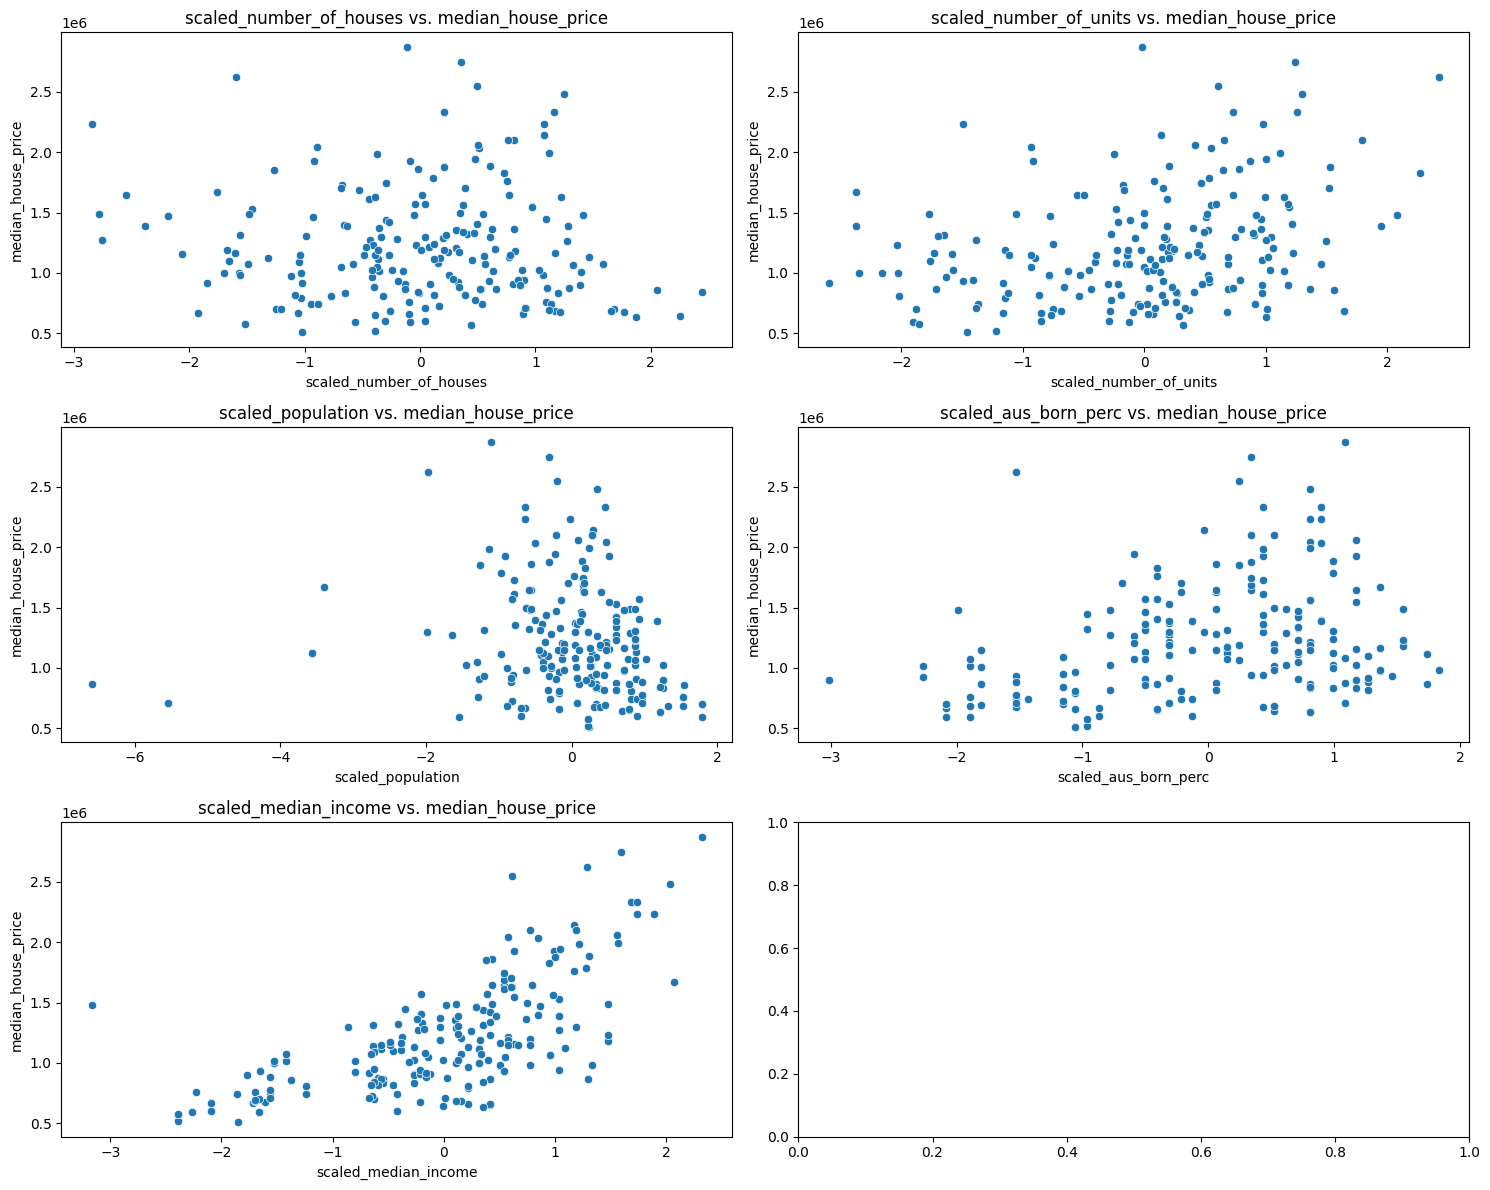

In [29]:
# 绘制自变量与目标变量之间的散点图，以观察是否存在线性关系
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 逐一绘制每个特征与目标变量的关系
features = ['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income']

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.scatterplot(x=scaled_data[feature], y=scaled_data['median_house_price'], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. median_house_price')

plt.tight_layout()
plt.show()

从这些散点图中可以看出，大部分自变量与目标变量（median_house_price）之间的线性关系较弱

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# 使用二次多项式特征进行扩展
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# 将数据集分为训练集和测试集
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 训练新的线性回归模型
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

# 使用测试集进行预测并计算 R2 值
y_pred_poly = model_poly.predict(X_test_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

r2_poly


-0.21590724346311307

进行生成多项式，结果发现模型的表现更差

In [20]:
# 删除异常值：我们将定义一个阈值来识别并删除每个特征中超过IQR的异常值
def remove_outliers(df, column):
    # 计算四分位数
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # 识别并删除异常值
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

# 对所有相关特征删除异常值
cleaned_data = scaled_data.copy()
for feature in features:
    cleaned_data = remove_outliers(cleaned_data, feature)

# 查看清理后的数据大小
cleaned_data.shape


(184, 6)

对数据进行异常值的删除，共删除了18个异常值

In [30]:
# 分离自变量和目标变量
X_clean = cleaned_data[['scaled_number_of_houses', 'scaled_number_of_units', 'scaled_population', 'scaled_aus_born_perc', 'scaled_median_income']]
y_clean = cleaned_data['median_house_price']

# 分割训练集和测试集
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# 训练线性回归模型
model_clean = LinearRegression()
model_clean.fit(X_train_clean, y_train_clean)

# 进行预测并计算 R2 值
y_pred_clean = model_clean.predict(X_test_clean)
r2_clean = r2_score(y_test_clean, y_pred_clean)
r2_clean


0.6889071134736058

R2得到了显著提升，模型性能得到很大改善，下面对模型进行进一步的改善

In [31]:
# 生成三次多项式特征 (degree=3)
poly_degree_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_degree_3_clean = poly_degree_3.fit_transform(X_clean)

# 分割三次多项式特征的训练集和测试集
X_train_poly_3, X_test_poly_3, y_train_poly_3, y_test_poly_3 = train_test_split(X_poly_degree_3_clean, y_clean, test_size=0.2, random_state=42)

# 训练线性回归模型 (使用三次多项式特征)
linear_model_poly_3 = LinearRegression()
linear_model_poly_3.fit(X_train_poly_3, y_train_poly_3)

# 预测并计算 R2 值
y_pred_poly_3 = linear_model_poly_3.predict(X_test_poly_3)
r2_poly_3 = r2_score(y_test_poly_3, y_pred_poly_3)

r2_poly_3


0.6692987341062093

生成三次多项式，结果发现R2值反而下降了

In [26]:
from sklearn.feature_selection import RFE

# 初始化线性回归模型
linear_model_rfe = LinearRegression()

# 使用递归特征消除选择最重要的特征
rfe = RFE(estimator=linear_model_rfe, n_features_to_select=5)
rfe.fit(X_train_clean, y_train_clean)

# 预测并计算 R2 值
y_pred_rfe = rfe.predict(X_test_clean)
r2_rfe = r2_score(y_test_clean, y_pred_rfe)

r2_rfe


0.6889071134736058

使用递归特征消除后，R2和原来保持不变

In [24]:
# 生成交互项和二次多项式特征 (degree=2)
poly_interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly_interaction_clean = poly_interaction.fit_transform(X_clean)

# 分割多项式交互特征的训练集和测试集
X_train_poly_interaction, X_test_poly_interaction, y_train_poly_interaction, y_test_poly_interaction = train_test_split(X_poly_interaction_clean, y_clean, test_size=0.2, random_state=42)

# 训练线性回归模型 (使用交互项特征)
linear_model_interaction = LinearRegression()
linear_model_interaction.fit(X_train_poly_interaction, y_train_poly_interaction)

# 预测并计算 R2 值
y_pred_poly_interaction = linear_model_interaction.predict(X_test_poly_interaction)
r2_poly_interaction = r2_score(y_test_poly_interaction, y_pred_poly_interaction)

r2_poly_interaction


0.6953023085257204

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 生成二次多项式特征 (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_clean = poly.fit_transform(X_clean)

# 分割多项式特征的训练集和测试集
X_train_poly_clean, X_test_poly_clean, y_train_poly_clean, y_test_poly_clean = train_test_split(X_poly_clean, y_clean, test_size=0.2, random_state=42)

# 训练线性回归模型 (用二次多项式特征)
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_train_poly_clean, y_train_poly_clean)

# 预测并计算 R2 值
y_pred_poly = linear_model_poly.predict(X_test_poly_clean)
r2_poly = r2_score(y_test_poly_clean, y_pred_poly)

# 输出 R2 值
r2_poly


0.7574925619553102